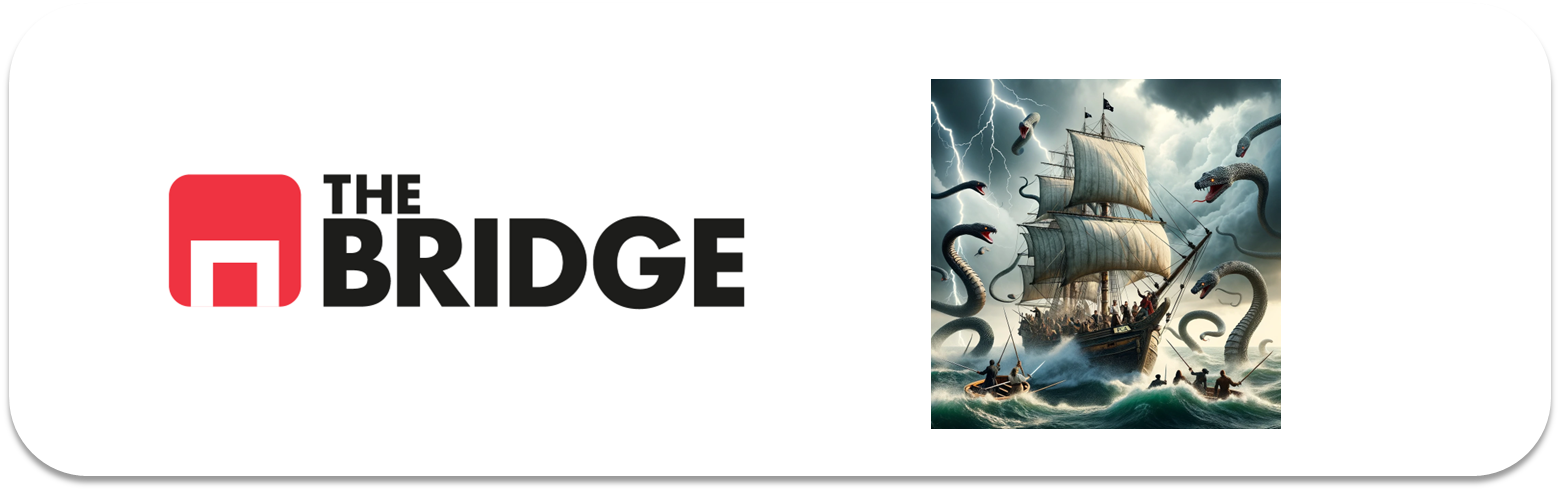

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [256]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toolbox_ML as tb

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [257]:
df_credit = pd.read_csv("./data/credit_npo.csv")
df_credit.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [258]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [259]:
df_credit.dropna(inplace=True)

In [260]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [261]:
tb.describe_df(df_credit).T

,Tipo,% Nulos,Valores infinitos,Valores Únicos,% Cardinalidad
SeriousDlqin2yrs,int64,0.00%,No,2,0.02%
RevolvingUtilizationOfUnsecuredLines,float64,0.00%,No,10314,87.29%
age,int64,0.00%,No,78,0.66%
NumberOfTime30-59DaysPastDueNotWorse,int64,0.00%,No,10,0.08%
DebtRatio,float64,0.00%,No,11472,97.09%
MonthlyIncome,float64,0.00%,No,4167,35.27%
NumberOfOpenCreditLinesAndLoans,int64,0.00%,No,43,0.36%
NumberOfTimes90DaysLate,int64,0.00%,No,13,0.11%
NumberRealEstateLoansOrLines,int64,0.00%,No,16,0.14%
NumberOfTime60-89DaysPastDueNotWorse,int64,0.00%,No,8,0.07%


### Eliminamos DebtRatio ya que tiene una alta cardinalidad

In [262]:
df_credit=df_credit.drop(["DebtRatio"], axis=1)

In [263]:
tb.tipifica_variables(df_credit,10,20)

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numerica Discreta
2,age,Numerica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Numerica Discreta
4,MonthlyIncome,Numerica Discreta
5,NumberOfOpenCreditLinesAndLoans,Numerica Discreta
6,NumberOfTimes90DaysLate,Numerica Discreta
7,NumberRealEstateLoansOrLines,Numerica Discreta
8,NumberOfTime60-89DaysPastDueNotWorse,Categórica
9,NumberOfDependents,Numerica Discreta


In [264]:
df_credit["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
98       10
5         4
11        1
Name: count, dtype: int64

In [265]:
df_credit["NumberOfTime60-89DaysPastDueNotWorse"] = df_credit["NumberOfTime60-89DaysPastDueNotWorse"].replace(98, 89)

In [266]:
df_credit["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
89       10
5         4
11        1
Name: count, dtype: int64

Variable	Únicos	Comentario

NumberOfTime30-59DaysPastDueNotWorse	10	✅ Se puede agrupar: 0-1

NumberOfTimes90DaysLate	13	✅ Se puede agrupar: 0-1

NumberOfTime60-89DaysPastDueNotWorse	8	✅ ["0", "1", "2"]

NumberOfDependents	10	✅ Número limitado, buena candidata ["0", "1", "2"]


In [267]:
df_credit["Time60_89_cat"] = (df_credit["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)

In [268]:
df_credit["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64

In [269]:
df_credit["Time30_59_bin"] = (df_credit["NumberOfTime30-59DaysPastDueNotWorse"] > 0).astype(int)

In [270]:
df_credit["NumberOfDependents"].value_counts()

NumberOfDependents
0.0     6413
1.0     2369
2.0     1813
3.0      881
4.0      251
5.0       61
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

In [271]:
df_credit["Dependents_cat"] = pd.cut(df_credit["NumberOfDependents"],
                              bins=[-1, 0, 1, float('inf')],
                              labels=["0", "1", "2"]).astype(int)

In [272]:
df_credit["NumberOfTimes90DaysLate"].value_counts()

NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1
13        1
Name: count, dtype: int64

In [273]:
df_credit["Times90DaysLate"] = pd.cut(
    df_credit["NumberOfTimes90DaysLate"],
    bins=[-1, 0, 2, float("inf")],
    labels=["0", "1", "2"]
).astype(int)

In [274]:
df_credit_clean = df_credit.drop(
    columns=["NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTime30-59DaysPastDueNotWorse", "NumberOfDependents","NumberOfTimes90DaysLate"]
).copy()

In [275]:
df_credit_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   MonthlyIncome                         11816 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 5   NumberRealEstateLoansOrLines          11816 non-null  int64  
 6   Time60_89_cat                         11816 non-null  int64  
 7   Time30_59_bin                         11816 non-null  int64  
 8   Dependents_cat                        11816 non-null  int64  
 9   Times90DaysLate                       11816 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1015.4 KB


In [276]:
tb.describe_df(df_credit_clean).T

,Tipo,% Nulos,Valores infinitos,Valores Únicos,% Cardinalidad
SeriousDlqin2yrs,int64,0.00%,No,2,0.02%
RevolvingUtilizationOfUnsecuredLines,float64,0.00%,No,10314,87.29%
age,int64,0.00%,No,78,0.66%
MonthlyIncome,float64,0.00%,No,4167,35.27%
NumberOfOpenCreditLinesAndLoans,int64,0.00%,No,43,0.36%
NumberRealEstateLoansOrLines,int64,0.00%,No,16,0.14%
Time60_89_cat,int64,0.00%,No,2,0.02%
Time30_59_bin,int64,0.00%,No,2,0.02%
Dependents_cat,int64,0.00%,No,3,0.03%
Times90DaysLate,int64,0.00%,No,3,0.03%


### Podemos eliminar la feature "RevolvingUtilizationOfUnsecuredLines" por su alta cardinalidad

In [277]:
df_credit_clean=df_credit_clean.drop(["RevolvingUtilizationOfUnsecuredLines"], axis=1)

In [278]:
target= "SeriousDlqin2yrs"

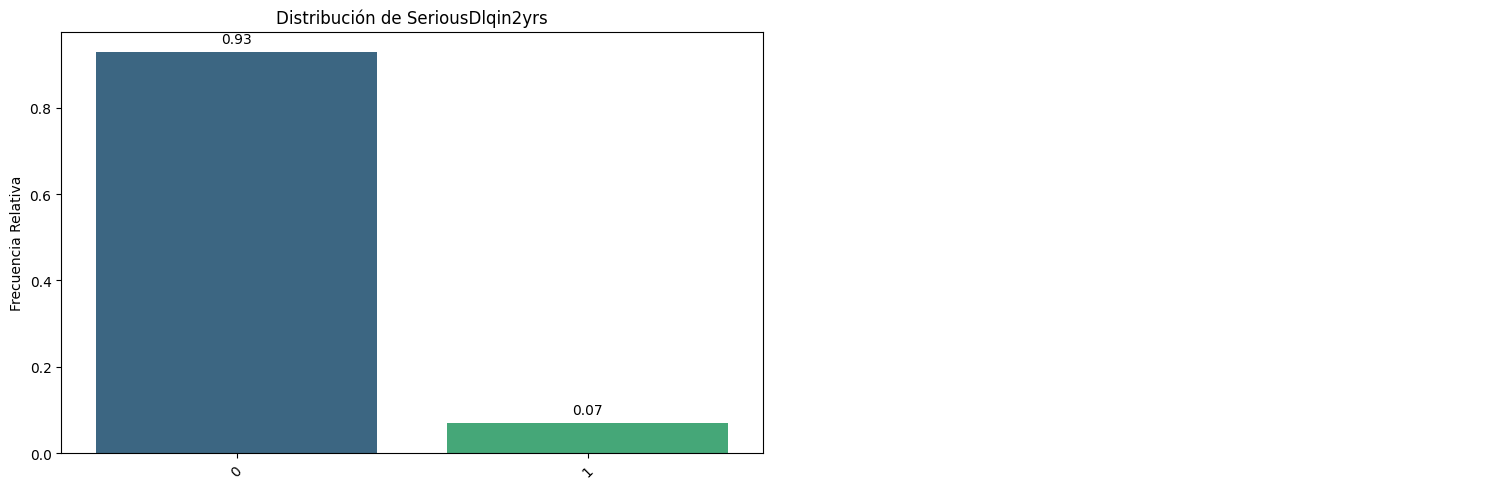

In [279]:
bt.pinta_distribucion_categoricas(df_credit_clean, [target], mostrar_valores=True,relativa=True)

In [280]:
train_set, test_set = train_test_split(df_credit_clean, test_size=0.2, random_state=42,stratify=df_credit_clean["SeriousDlqin2yrs"])

*Tenemos un dataset muy desequilibrado, utilizaremos  un "balanced_accuracy" en estos casos suele ser una buena métrica, si las indicaiones de "Negocio" no nos sugieren otra cosa*

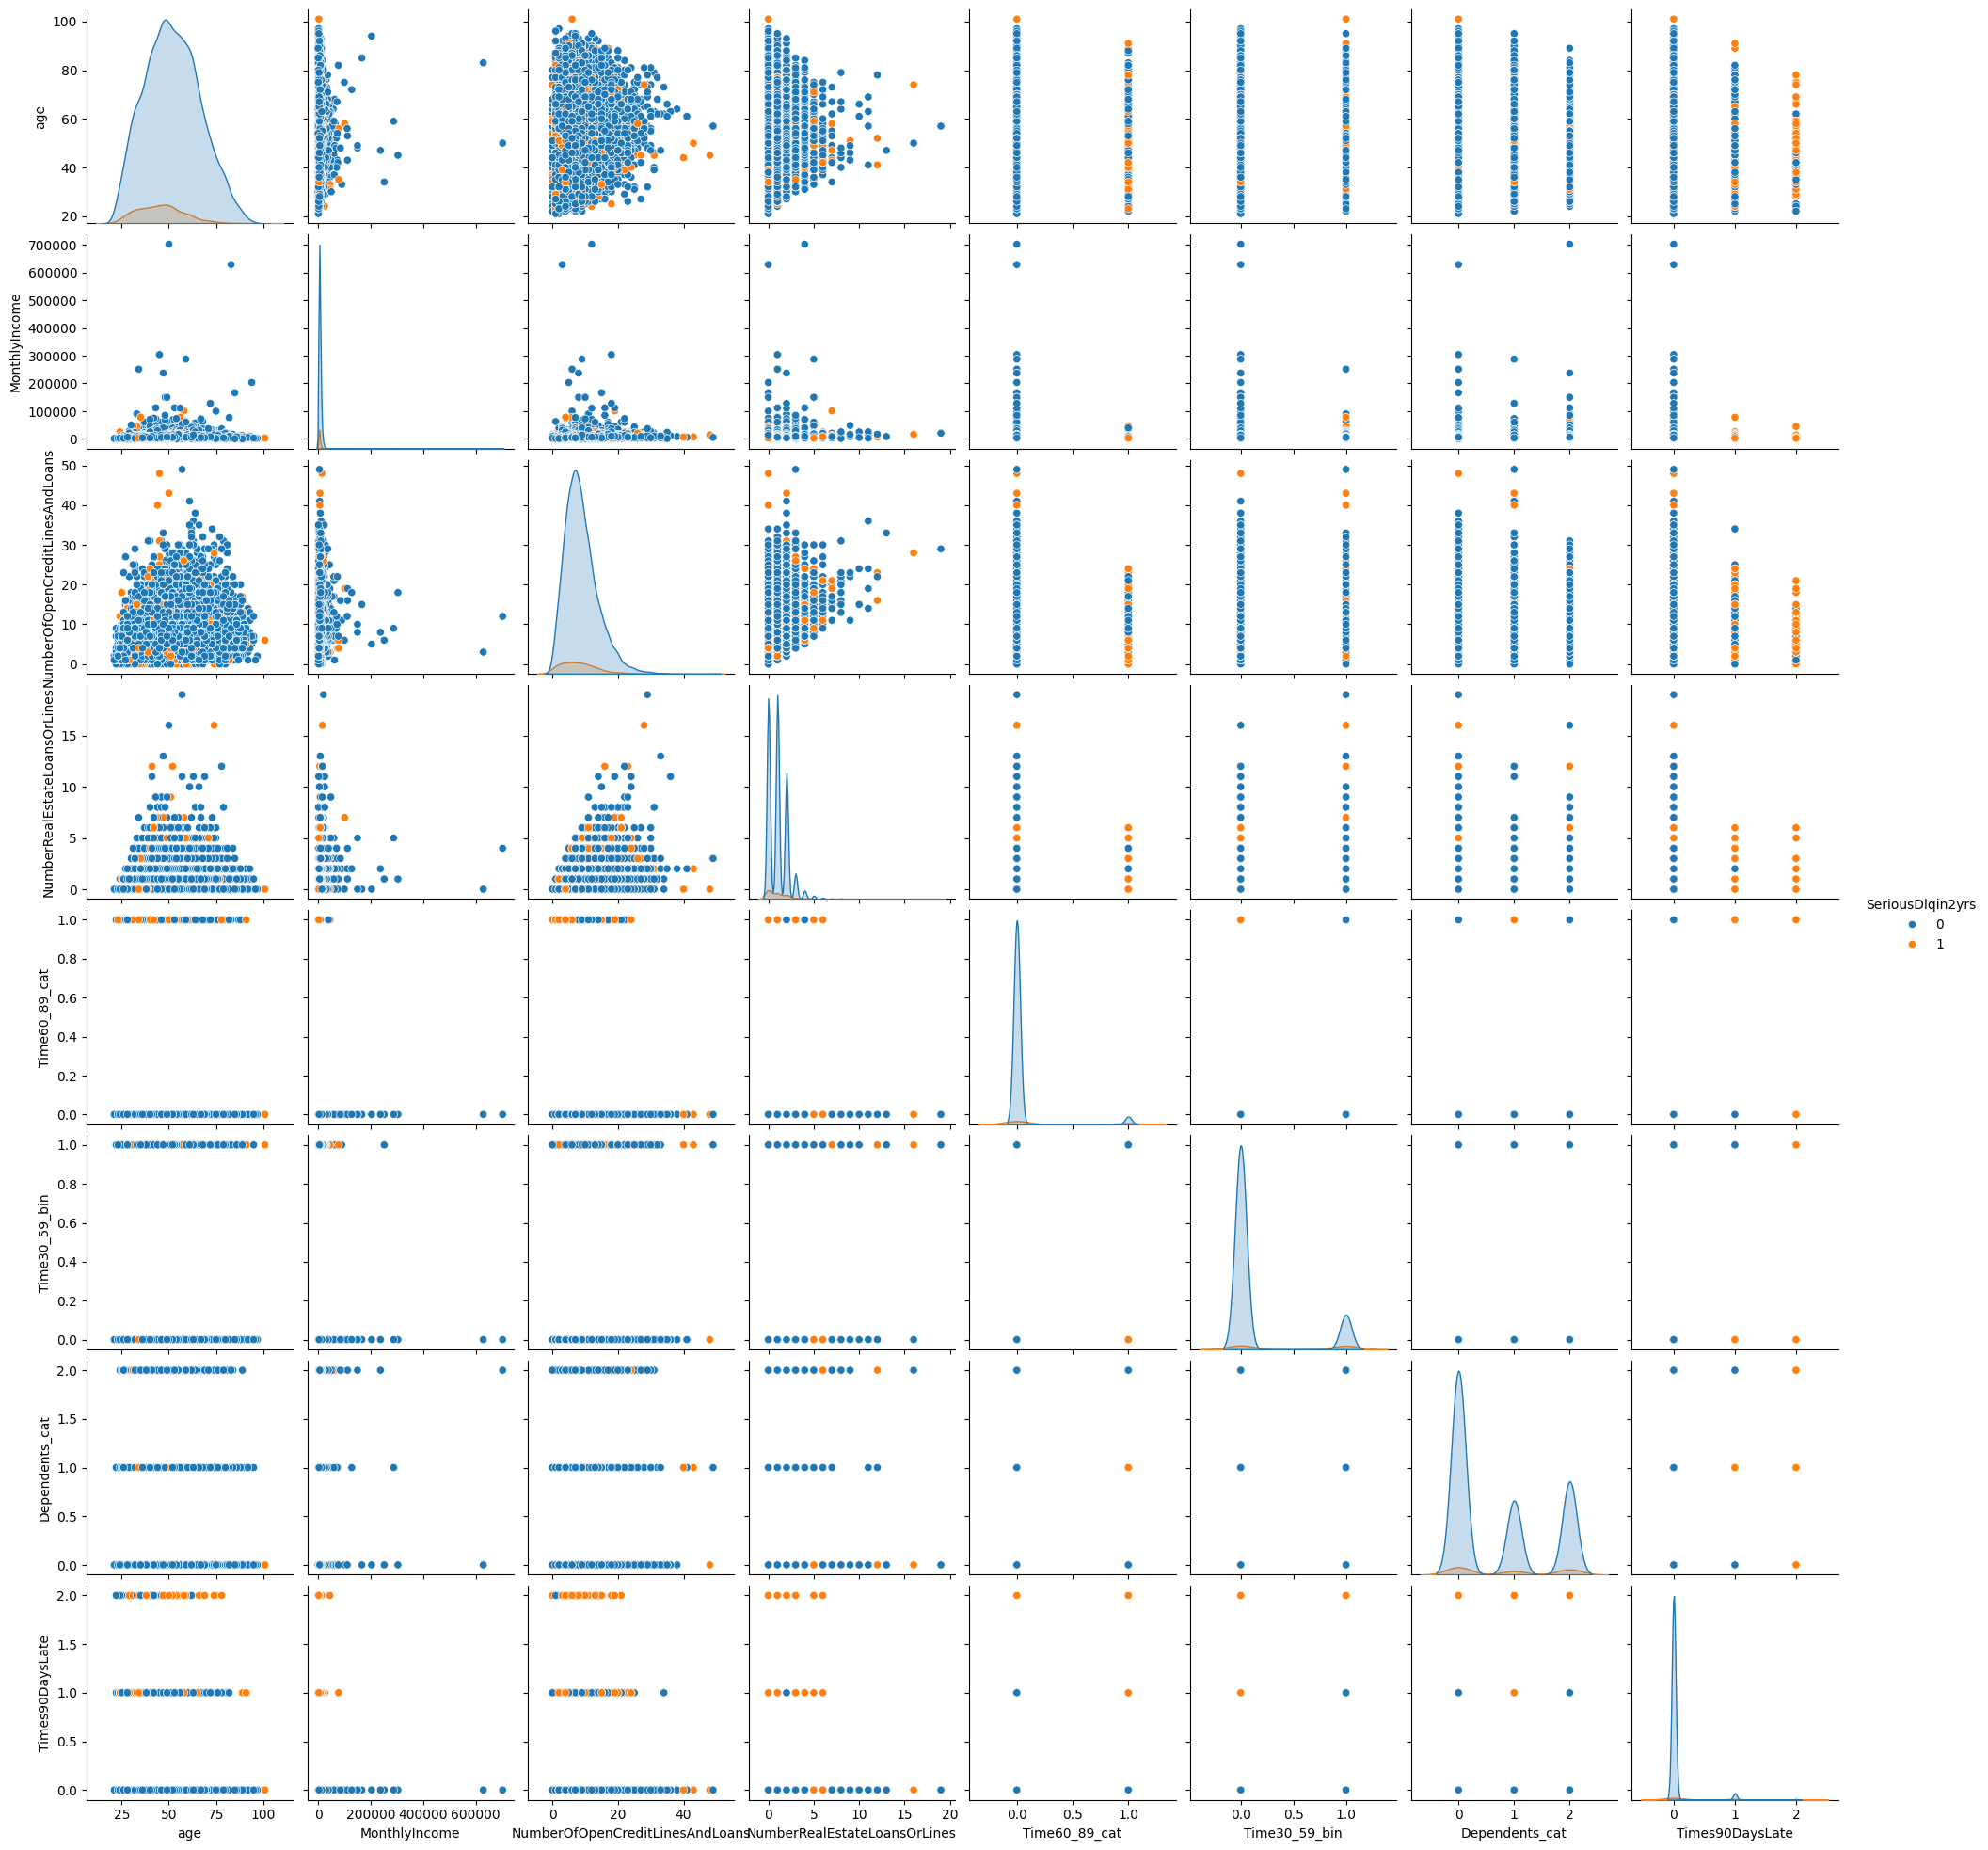

In [281]:
sns.pairplot(df_credit_clean,hue=target)

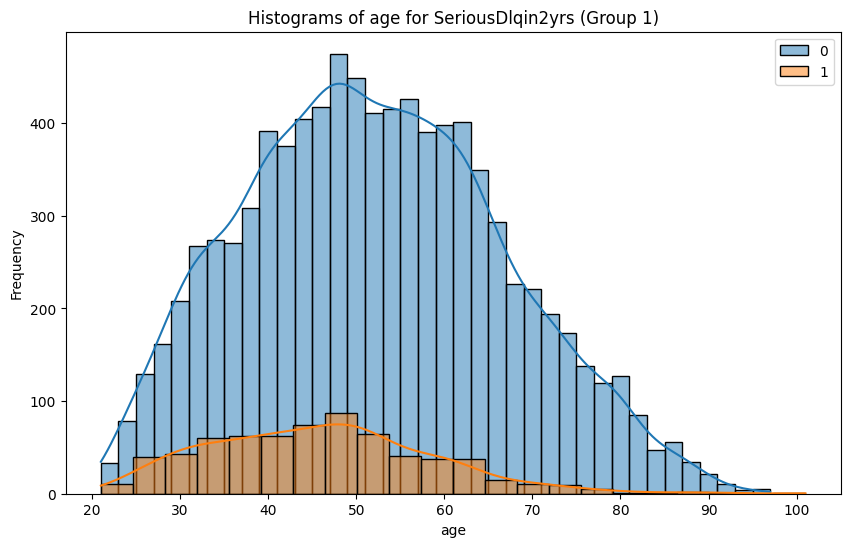

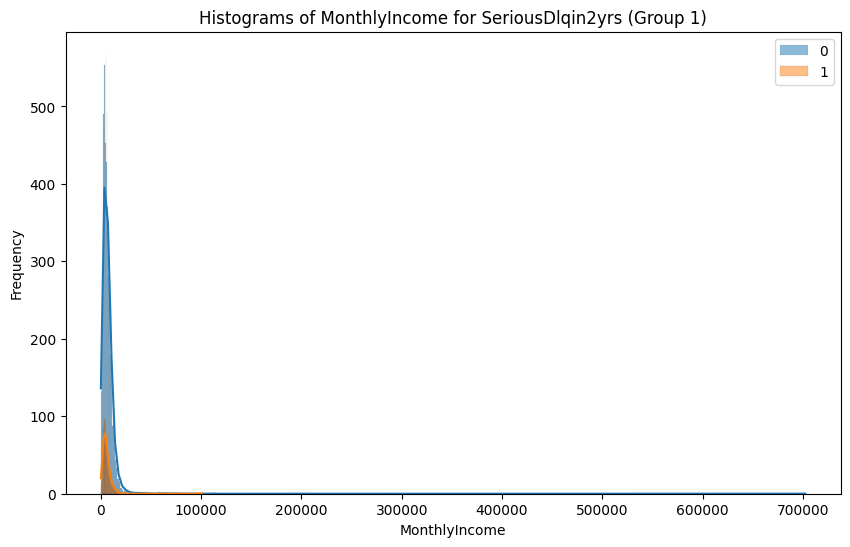

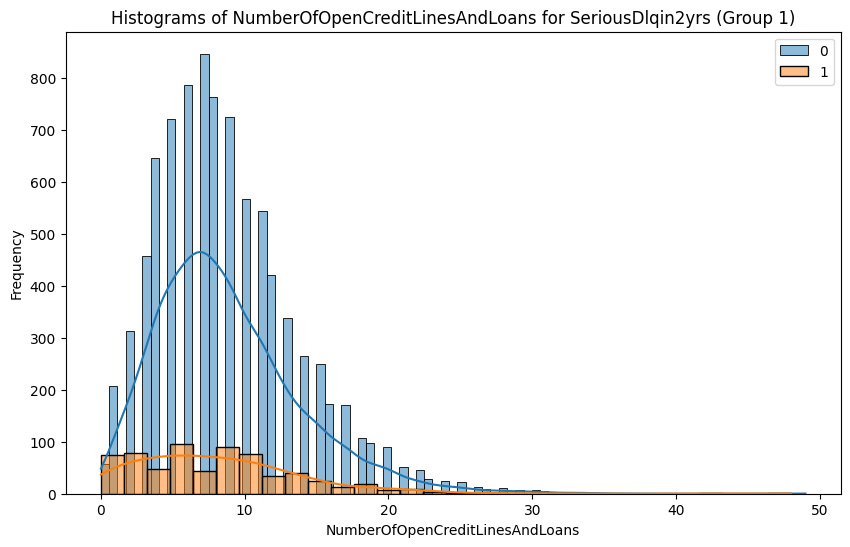

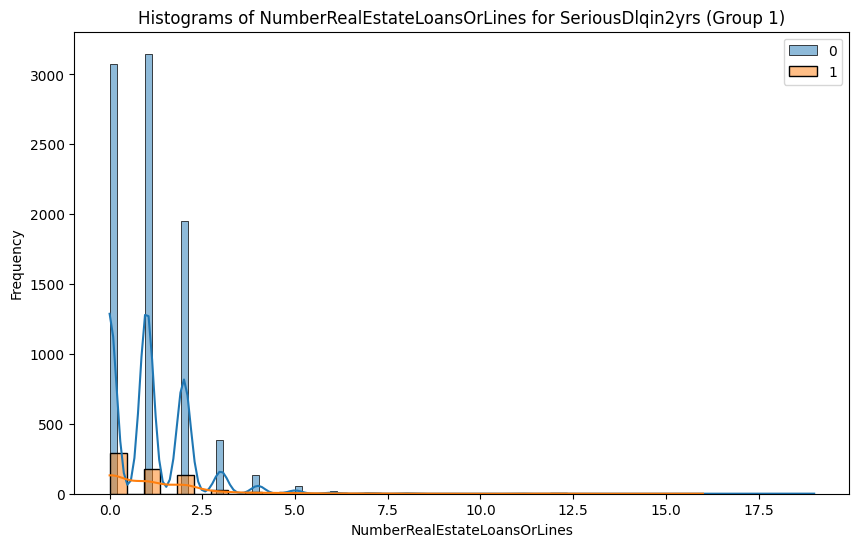

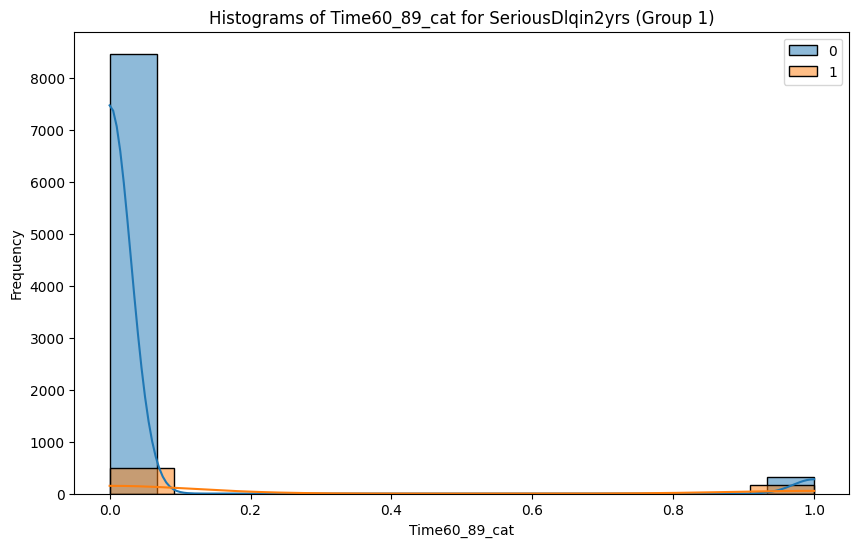

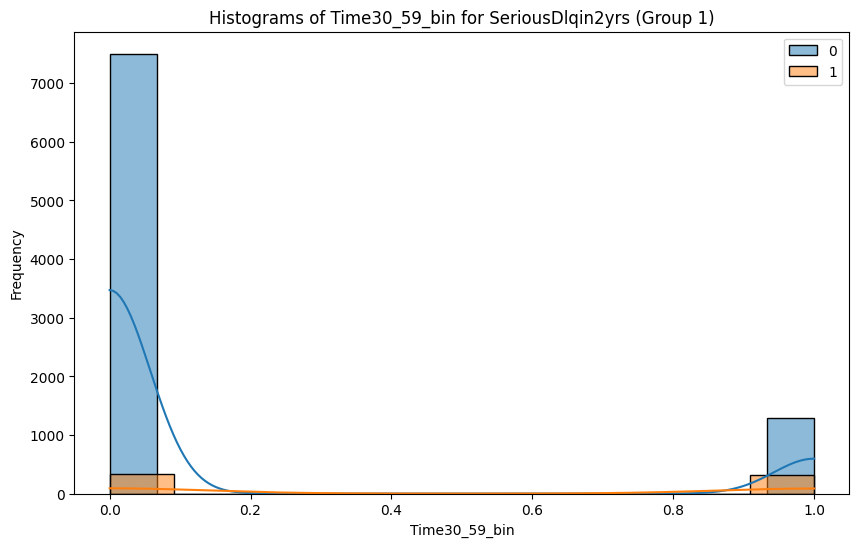

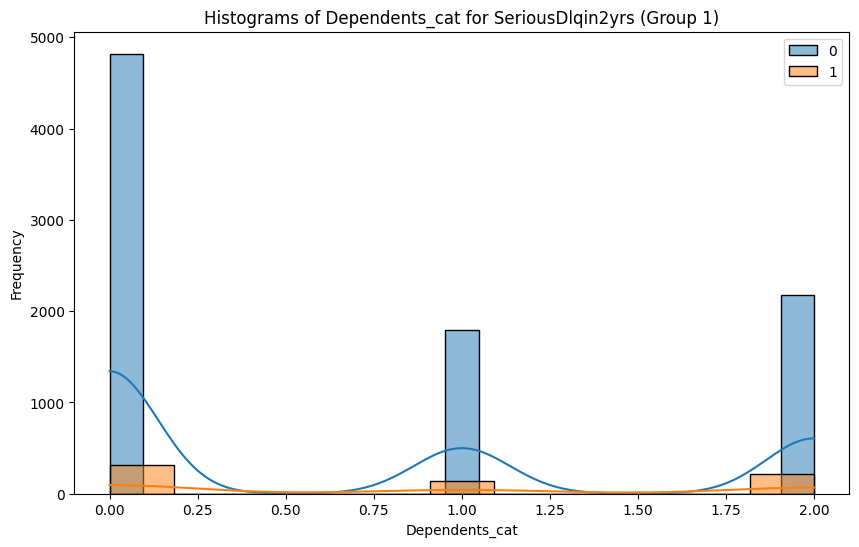

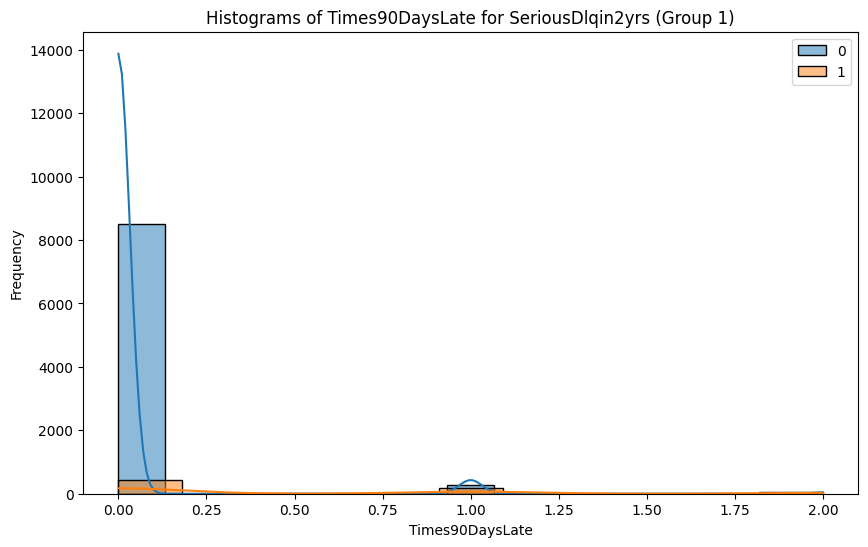

In [282]:
for col in train_set.columns:
    if col != target:
        bt.plot_grouped_histograms(train_set, target, col, group_size = 2)

### Con el anañisis del miniEDA podemos observar que las features no nos dicen mucho, asi que procedemos a aplicar modelos de reduccion asi como su implementacion.

### Seleccionamos un baseline para comparar con otros modelos

In [283]:
X_train = train_set.drop(target, axis=1)
y_train = train_set[target]

In [325]:
X_test= test_set.drop(target, axis=1)
y_test = test_set[target]

In [284]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
baseline= np.mean(cross_val_score(rfc, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
baseline

np.float64(0.5312500340982782)

### Aplicamos con SelectKBest

In [285]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest

,age,Time60_89_cat,Time30_59_bin,Dependents_cat,Times90DaysLate
0,61.0,0.0,0.0,0.0,0.0
1,41.0,0.0,0.0,0.0,0.0
2,49.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0
4,76.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
9447,61.0,0.0,0.0,0.0,0.0
9448,64.0,0.0,0.0,0.0,0.0
9449,29.0,0.0,0.0,2.0,0.0
9450,51.0,0.0,1.0,0.0,0.0


In [315]:
selector.get_feature_names_out()

array(['age', 'Time60_89_cat', 'Time30_59_bin', 'Dependents_cat',
       'Times90DaysLate'], dtype=object)

In [286]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
model_2= np.mean(cross_val_score(rfc, X_train_kbest, y_train, cv = 5, scoring = "balanced_accuracy"))
model_2

np.float64(0.5657699040220329)

In [287]:
baseline

np.float64(0.5312500340982782)

### Obtuvimos una mejoria pero aun es malo el resultado 

In [290]:
from sklearn.feature_selection import SelectFromModel
selector_model = SelectFromModel(estimator = rfc, threshold= "median")
selector_model.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5, random_state=42),
                threshold='median')

In [291]:
selector_model.get_feature_names_out()

array(['NumberOfOpenCreditLinesAndLoans', 'Time60_89_cat',
       'Time30_59_bin', 'Times90DaysLate'], dtype=object)

In [292]:
from sklearn.linear_model import LogisticRegression

lc_clf = LogisticRegression(max_iter = 1000)
X_train_model_median = selector_model.transform(X_train)
score_model_median = np.mean(cross_val_score(lc_clf, X_train_model_median, y_train, cv = 5, scoring = "balanced_accuracy"))
score_model_median

np.float64(0.5761037462805924)

### Aplicando SelectFromModel seguimos mejorando pero no lo sufciente

In [293]:
from sklearn.feature_selection import RFE
rf_RFE = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

# RFE
rfe = RFE(estimator=rf_RFE, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

# Crear DataFrame con los rankings
ranking_df = pd.DataFrame({
    "feature": X_train.columns,
    "ranking": rfe.ranking_
}).sort_values("ranking")

print(ranking_df)

                           feature  ranking
0                              age        1
2  NumberOfOpenCreditLinesAndLoans        1
5                    Time30_59_bin        1
4                    Time60_89_cat        1
7                  Times90DaysLate        1
1                    MonthlyIncome        2
3     NumberRealEstateLoansOrLines        3
6                   Dependents_cat        4


In [294]:
X_train_rfe = rfe.transform(X_train)

In [296]:
features_rfe = rfe.get_feature_names_out()
features_rfe

array(['age', 'NumberOfOpenCreditLinesAndLoans', 'Time60_89_cat',
       'Time30_59_bin', 'Times90DaysLate'], dtype=object)

In [295]:
rfe_score = np.mean(cross_val_score(rfe, X_train_rfe, y_train, cv = 5, scoring= "balanced_accuracy"))
rfe_score

np.float64(0.5633550409517495)

In [299]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42)

sfs = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs.fit(X_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5, scoring='balanced_accuracy')

In [304]:
print("Elegidasd SFS:", sfs.get_feature_names_out())

Elegidasd SFS: ['age' 'MonthlyIncome' 'Time60_89_cat' 'Time30_59_bin' 'Times90DaysLate']


In [309]:
X_train_sfs = sfs.transform(X_train)

In [312]:
selected_features = X_train.columns[sfs.get_support()]

# Crear nuevo X con solo las columnas seleccionadas
X_train_sfs = X_train[selected_features]

# Evaluar con validación cruzada
sfs_score = np.mean(cross_val_score(rf_SFS, X_train_sfs, y_train, cv=5, scoring="balanced_accuracy"))
sfs_score

np.float64(0.5990460969283599)

##  Features seleccionadas por cada modelo:


In [321]:
print("\n Features seleccionadas por cada técnica:\n")

print("🔹 SelectKBest:")
for feat in selector.get_feature_names_out():
    print(f"   - {feat}")

print("\n🔹 SelectFromModel:")
for feat in selector_model.get_feature_names_out():
    print(f"   - {feat}")

print("\n🔹 RFE (Recursive Feature Elimination):")
for feat in rfe.get_feature_names_out():
    print(f"   - {feat}")

print("\n🔹 SFS (Sequential Feature Selector):")
for feat in sfs.get_feature_names_out():
    print(f"   - {feat}")


 Features seleccionadas por cada técnica:

🔹 SelectKBest:
   - age
   - Time60_89_cat
   - Time30_59_bin
   - Dependents_cat
   - Times90DaysLate

🔹 SelectFromModel:
   - NumberOfOpenCreditLinesAndLoans
   - Time60_89_cat
   - Time30_59_bin
   - Times90DaysLate

🔹 RFE (Recursive Feature Elimination):
   - age
   - NumberOfOpenCreditLinesAndLoans
   - Time60_89_cat
   - Time30_59_bin
   - Times90DaysLate

🔹 SFS (Sequential Feature Selector):
   - age
   - MonthlyIncome
   - Time60_89_cat
   - Time30_59_bin
   - Times90DaysLate


### Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos anteriores

In [322]:
from collections import Counter
import pandas as pd

# 1. Obtener listas de features seleccionadas por cada método
feat_kbest = selector.get_feature_names_out()
feat_model = selector_model.get_feature_names_out()
feat_rfe   = rfe.get_feature_names_out()
feat_sfs   = sfs.get_feature_names_out()

# 2. Unir todas las listas en una sola
all_selected_features = list(feat_kbest) + list(feat_model) + list(feat_rfe) + list(feat_sfs)

# 3. Contar cuántas veces aparece cada feature
feature_votes = Counter(all_selected_features)

# 4. Convertir a DataFrame ordenado
df_votes = pd.DataFrame.from_dict(feature_votes, orient='index', columns=['Votos'])
df_votes.sort_values(by='Votos', ascending=False, inplace=True)

# 5. Mostrar resultados
print("🎯 Features con más votos entre métodos:")
display(df_votes)

🎯 Features con más votos entre métodos:


,Votos
Time60_89_cat,4
Time30_59_bin,4
Times90DaysLate,4
age,3
NumberOfOpenCreditLinesAndLoans,2
Dependents_cat,1
MonthlyIncome,1


### Seleccionar las features mas votadas y Optimizar los hiperparámetros del mejor modelo y evaluarlo contra test.

In [331]:
features_final = ("Time60_89_cat", "Time30_59_bin", "Times90DaysLate", "age", "NumberOfOpenCreditLinesAndLoans")

In [333]:
features_final = ["Time60_89_cat", "Time30_59_bin", "Times90DaysLate", "age", "NumberOfOpenCreditLinesAndLoans"]

X_train_final = X_train[features_final]
X_test_final = X_test[features_final]

In [334]:

# Crear X_train_final y X_test_final con solo las mejores variables
X_train_final = X_train[features_final]
X_test_final = X_test[features_final]  # <-- asumiendo que hiciste split antes

# Modelo final con hiperparámetros ya probados
final_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
final_model.fit(X_train_final, y_train)

# Predecir en test
y_pred_test = final_model.predict(X_test_final)

# Evaluar con balanced_accuracy en test
from sklearn.metrics import balanced_accuracy_score
balanced_test_score = balanced_accuracy_score(y_test, y_pred_test)

print(f"✅ Balanced Accuracy en test: {balanced_test_score:.4f}")

✅ Balanced Accuracy en test: 0.5671


In [335]:
final_model_score = np.mean(cross_val_score(final_model, X_train_final, y_train, cv=5, scoring="balanced_accuracy"))
final_model_score

np.float64(0.5638907167321622)

In [337]:
from sklearn.model_selection import GridSearchCV

# Hiperparámetros para probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_final, y_train)

# Mejor combinación
print(" Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar en test
best_rf = grid_search.best_estimator_
y_pred_test = best_rf.predict(X_test_final)
balanced_test_score = balanced_accuracy_score(y_test, y_pred_test)

print(f" Balanced Accuracy en test con RF optimizado: {balanced_test_score:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
 Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
 Balanced Accuracy en test con RF optimizado: 0.5932


## Conclusión
A lo largo del análisis se observó que, aunque se lograron mejoras mediante la selección de variables y la optimización de hiperparámetros, el rendimiento del modelo se vio limitado por el fuerte desbalance en la variable objetivo (SeriousDlqin2yrs).

Esto se refleja en métricas como el balanced_accuracy, que fue elegida precisamente para corregir el sesgo hacia la clase mayoritaria. A pesar de la optimización, el mejor modelo alcanzó apenas un 59.3%, lo que sugiere que el clasificador aún tiene dificultades para identificar correctamente la clase minoritaria (positivos reales).

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.